In [11]:
%pip install numpy
%pip install seaborn

In [27]:
import time
import subprocess
import pandas as pd
import seaborn as sns
from IPython.display import display

In [25]:
dimensions = [i for i in range(2, 9)]

runtime_data = []

for dimension in dimensions:
    print("Running dimension", dimension)
    starttime = time.time()
    process = subprocess.run(
        [f"rbox 1000 D{dimension} | qhull", str(dimension)],
        stdout=subprocess.DEVNULL,
        shell=True,
    )
    new_row = pd.DataFrame({
        'Dimension': [dimension],
        'Runtime': [time.time() - starttime]
    })
    runtime_data.append({'Dimension': dimension, 'Runtime': time.time() - starttime})

runtime = pd.DataFrame(runtime_data)

Running dimension 2
Running dimension 3
Running dimension 4
Running dimension 5
Running dimension 6
Running dimension 7
Running dimension 8


In [24]:
display(runtime)

,Dimension,Runtime
0,2,0.004164
1,3,0.005994
2,4,0.007446
3,5,0.034878
4,6,0.432839
5,7,4.127252
6,8,42.709124


/tmp/ipykernel_24976/1896403544.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.get_figure().show()


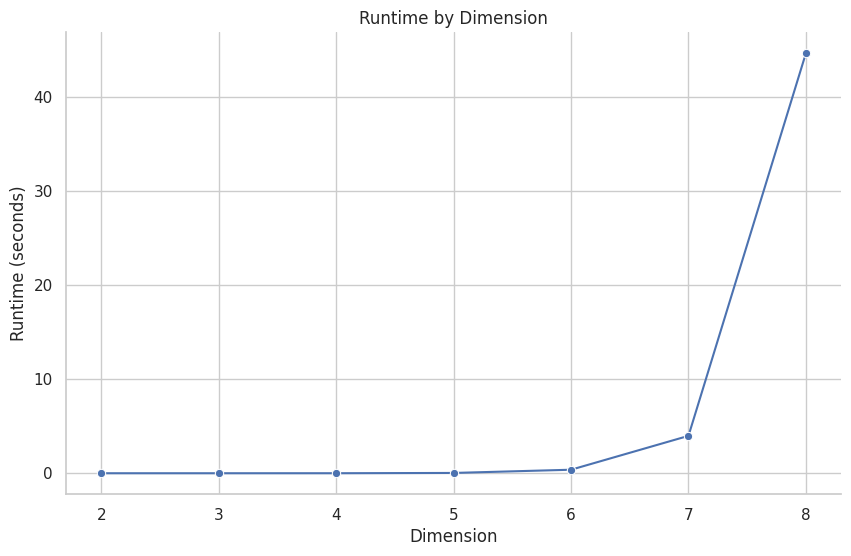

In [29]:
sns.set(style="whitegrid", rc={"figure.figsize": (10, 6)})
plot = sns.lineplot(x='Dimension', y='Runtime', data=runtime, marker='o')
plot.set_title('Runtime by Dimension')
plot.set_xlabel('Dimension')
plot.set_ylabel('Runtime (seconds)')

# Show plot
sns.despine()
plot.get_figure().show()